### Importing Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Basic Information About Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot: xlabel='Potability', ylabel='count'>

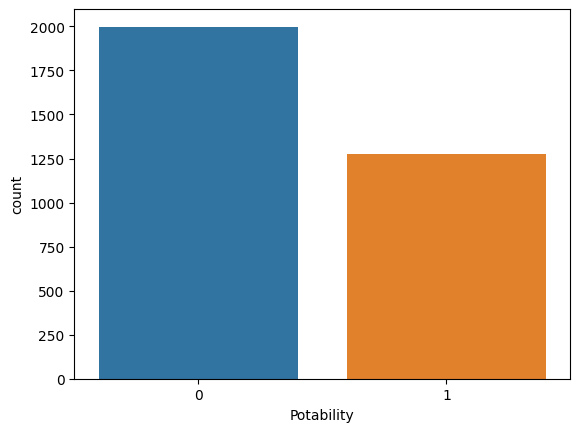

In [5]:
sns.countplot(x=df["Potability"])

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot: >

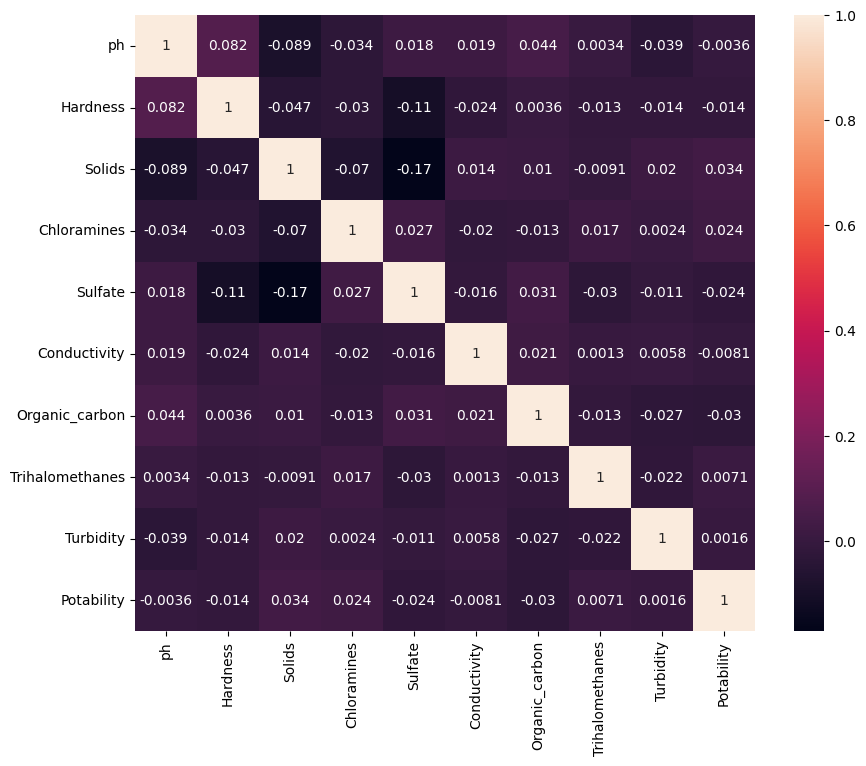

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Missing Value Imputation

In [9]:
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())

In [10]:
df['ph']=df['ph'].fillna(df['ph'].median())

In [11]:
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### splitting Data For training and validation

In [14]:
X=df.drop('Potability',axis=1)
y=df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2128,5.514748,228.735924,35343.628580,4.346608,333.775777,526.112381,14.930982,46.780508,2.798158
1519,7.036752,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891
40,7.036752,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004
1151,4.303575,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537
2404,9.624727,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257
...,...,...,...,...,...,...,...,...,...
835,7.440825,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
1653,6.648005,191.841801,15176.290678,5.661663,333.775777,471.047129,15.438287,56.532387,3.829784
2607,7.675914,233.300759,23673.100606,8.407497,333.775777,232.613624,18.459408,60.993590,5.040461


### Scaling

In [16]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.fit_transform(X_test)

In [17]:
X_train_scaled

array([[-1.06624116,  0.97249017,  1.53580712, ...,  0.1880379 ,
        -1.25125089, -1.51463513],
       [-0.02549062,  0.42140973, -0.94433514, ..., -1.18739347,
        -1.34485656, -0.7843761 ],
       [-0.02549062,  1.12930924, -1.1694926 , ...,  1.21207458,
        -1.51137132, -0.59739159],
       ...,
       [-0.29131659, -0.15685217, -0.77211908, ...,  0.34047695,
        -0.63301136, -0.18534202],
       [ 0.4115697 ,  1.11222141,  0.20024576, ...,  1.24828798,
        -0.35018463,  1.37466739],
       [-0.02549062, -1.10350772, -0.91322736, ...,  0.27148617,
         0.57423597,  0.21638536]])

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#### Transformer for Imputation

In [19]:
trf1 = ColumnTransformer([
    ('sulphate_impute',SimpleImputer(),[4]),
    ('trihalomethanes_impute',SimpleImputer(),[7]),
    ('ph_impute',SimpleImputer(strategy='median'),[0])
],remainder='passthrough')

#### Transformer for Scaling

In [20]:
trf2=ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,9))
])

### Transformer for logistic Regression

In [21]:
trf3=LogisticRegression()

In [22]:
from sklearn.pipeline import Pipeline, make_pipeline

### Pipeline For Logistic Regression

In [23]:
pipelr=Pipeline(
[
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

### LogisticRegression GridSearchCV

In [24]:
param_grid1={
    'trf3__penalty':['l1','l2','elasticnet'],
    'trf3__solver':['liblinear','saga']
}
grid1=GridSearchCV(pipelr,param_grid1,cv=5,scoring='accuracy')
grid1.fit(X_train,y_train)
print(grid1.best_params_)
print(grid1.best_score_)

{'trf3__penalty': 'l1', 'trf3__solver': 'liblinear'}
0.6076335877862596


C:\Users\JAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\JAY\AppData\Local\Programs\Python\Python310\lib\site-packag

### Column Transformer for Decision Tree

In [25]:
trf3dt=DecisionTreeClassifier()

### Pipeline for Decision Tree

In [26]:
pipedt=Pipeline(
[
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3dt',trf3dt)
])

### DecisionTreeClassifier GridSearchCV

In [27]:
param_grid2={
    'trf3dt__criterion':['gini','entropy'],
    'trf3dt__max_depth':[4,5,6,7,8,9,10,15],
    'trf3dt__min_samples_leaf':[1,2,3,4,5]
}
grid2=GridSearchCV(pipedt,param_grid2,cv=5,scoring='accuracy')
grid2.fit(X_train,y_train)
print(grid2.best_params_)
print(grid2.best_score_)

{'trf3dt__criterion': 'gini', 'trf3dt__max_depth': 9, 'trf3dt__min_samples_leaf': 3}
0.6419847328244275


In [28]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=3)
dt1.fit(X_train_scaled,y_train)
ypreddt=dt1.predict(X_test_scaled)
acc2=accuracy_score(y_test,ypreddt)
acc2*100

66.61585365853658

In [29]:
confusion_matrix(y_test,ypreddt)

array([[368,  44],
       [175,  69]], dtype=int64)

### RandomForestClassifier Transformer

In [30]:
trf3rf=RandomForestClassifier()

### RandomForestClassifier Pipeline

In [31]:
piperf=Pipeline(
[
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3rf',trf3rf)
])

In [32]:
param_grid3={
    'trf3rf__criterion':['gini','entropy'],
    'trf3rf__n_estimators':[100,200],
    'trf3rf__max_depth':[10,20],
    'trf3rf__min_samples_split':[2,3,4,5]
}
grid3=GridSearchCV(piperf,param_grid3,cv=5,scoring='accuracy')
grid3.fit(X_train,y_train)
print(grid3.best_params_)
print(grid3.best_score_)

{'trf3rf__criterion': 'gini', 'trf3rf__max_depth': 20, 'trf3rf__min_samples_split': 5, 'trf3rf__n_estimators': 200}
0.666030534351145


In [33]:
ranfs1=RandomForestClassifier(criterion='entropy',n_estimators=100, max_depth=20,min_samples_split=2)
ranfs1.fit(X_train_scaled,y_train)
ypredrf=ranfs1.predict(X_test_scaled)
acc3=accuracy_score(y_test,ypredrf)
acc3*100

67.22560975609755

In [34]:
confusion_matrix(y_test,ypredrf)

array([[375,  37],
       [178,  66]], dtype=int64)

### Support Vector Machine

In [35]:
trf3svc=SVC()

In [36]:
pipesvc=Pipeline(
[
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3svc',trf3svc)
])

In [37]:
param_grid4={
    'trf3svc__degree':[1,2,3,4,5],
    'trf3svc__gamma':['scale','auto'],
    'trf3svc__kernel':['rbf','poly','sigmoid'],
    'trf3svc__C':[0.2,0.4,0.8]
}
grid4=GridSearchCV(pipesvc,param_grid4,cv=5,scoring='accuracy')
grid4.fit(X_train,y_train)
print(grid4.best_params_)
print(grid4.best_score_)

{'trf3svc__C': 0.8, 'trf3svc__degree': 1, 'trf3svc__gamma': 'scale', 'trf3svc__kernel': 'rbf'}
0.6740458015267177


In [38]:
sv1=SVC(degree=1,gamma='scale',kernel='rbf',C=0.8)
sv1.fit(X_train_scaled,y_train)
ypredsv=sv1.predict(X_test_scaled)
acc4=accuracy_score(y_test,ypredsv)
acc4

0.6844512195121951

In [39]:
confusion_matrix(y_test,ypredsv)

array([[389,  23],
       [184,  60]], dtype=int64)

### GradientClassifierBoosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
trf3gbc=GradientBoostingClassifier()

In [42]:
pipegbc=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3gbc',trf3gbc)
])

In [43]:
param_gbc={
    'trf3gbc__n_estimators':[100,150,200],
    'trf3gbc__max_depth':[5,10,15],
    'trf3gbc__min_samples_split':[3,4,5]
}
gridsvc=GridSearchCV(pipegbc,param_gbc,cv=5,scoring='accuracy')
gridsvc.fit(X_train,y_train)
print(gridsvc.best_params_)
print(gridsvc.best_score_)

{'trf3gbc__max_depth': 10, 'trf3gbc__min_samples_split': 5, 'trf3gbc__n_estimators': 200}
0.6503816793893129


In [47]:
gbc=GradientBoostingClassifier(max_depth=10,min_samples_split=5,n_estimators=200)
gbc.fit(X_train_scaled,y_train)
ypredgbc=gbc.predict(X_test_scaled)
accgbc=accuracy_score(y_test,ypredgbc)
accgbc

0.6585365853658537

In [48]:
gbcconf=confusion_matrix(y_test,ypredgbc)
gbcconf

array([[347,  65],
       [159,  85]], dtype=int64)

In [49]:
conclussion_df=pd.DataFrame({
    'Algorithm':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GradientBoosting'],
    'Accuracy':[60.76,66.31,67.22,68.44,65.85]
})
conclussion_df

,Algorithm,Accuracy
0,LogisticRegression,60.76
1,DecisionTreeClassifier,66.31
2,RandomForestClassifier,67.22
3,SVC,68.44
4,GradientBoosting,65.85
